In [1]:
import pyplume as pl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from time import time
import os

In [2]:
inputname = 'namelist.input.txt'
p1_metadata = pl.plume_metadata(inputname)
D  = p1_metadata.D
dx = p1_metadata.dx
dz = p1_metadata.dz
dt = p1_metadata.dt
Ta = p1_metadata.Ta
g  = p1_metadata.g
nu  = p1_metadata.nu
threshold = p1_metadata.threshold

In [3]:
#Path to data folder
folder = r'Z:\Thanh\nbl.carbondioxide.h.2.5\a.highfreq\instantaneous'
dataname = "CO2.h.2.5"

In [4]:
# import pandas as pd
# def hf_csv2array (data):
#     temp = np.array(data)
#     nt = np.shape(temp)[0]
    
#     a_string = temp[1,0]
#     a_list = a_string.split()
#     map_object = map(float, a_list)
#     list_of_integers = list(map_object)
#     testnz = np.array(list_of_integers)
    
#     nz = int(np.shape(testnz)[0])
#     newarray = np.zeros((nt,nz))
    
#     for i in range (nt):
#         a_string = temp[i,0]
#         a_list = a_string.split()
#         map_object = map(float, a_list)
#         list_of_integers = list(map_object)
#         newarray[i,:] = np.array(list_of_integers)
#     return newarray
# def hf_loadcsv(filename):
#     temp = pd.read_csv(filename,skiprows=1,header=None)
#     temp= hf_csv2array(temp)
#     temp = temp.T
#     return temp

# # idata = hf_loadcsv(folder+"\\i0001.d01.PH")
# center = hf_loadcsv(folder+"\\c0001.d01.PH")
# jdata = hf_loadcsv(folder+"\\j0001.d01.PH")

In [5]:
# # Loading matfiles
# start = time()
# U = pl.hf_loadmat(folder+"\\UU")
# V = pl.hf_loadmat(folder+"\\VV")
# W = pl.hf_loadmat(folder+"\\WW")
# T = pl.hf_loadmat(folder+"\\TH")
# end = time()
# print((end-start)/60)

In [6]:
# # Combining all CSV files into one matfile 
# # You only do this once
# # Take long time about 1h

# nx = 3
# start = time()
# pl.hf_csv2mat(folder,"QP",nx)
# pl.hf_csv2mat(folder,"PR",nx)
# pl.hf_csv2mat(folder,"TH",nx)
# pl.hf_csv2mat(folder,"UU",nx)
# pl.hf_csv2mat(folder,"VV",nx)
# pl.hf_csv2mat(folder,"WW",nx)
# end = time()
# print((end-start)/60)

In [4]:
nx = 3
U = pl.hf_loadcsvfulldata(folder,"UU",nx)
W = pl.hf_loadcsvfulldata(folder,"WW",nx)
V = pl.hf_loadcsvfulldata(folder,"VV",nx)
T = pl.hf_loadcsvfulldata(folder,"TH",nx)

In [5]:
nx,nz,nt = np.shape(T)
print(nx,nz)

3 701


In [6]:
# Creating a object called hf_profile1
# Around 15 mins
start = time()
hf_profile1 = pl.high_frequency_profile(T,U,V,W,nx,nz,D,Ta,g,threshold)
end = time()
print("Minutes: ",round((end-start)/60,2))

Minutes:  0.12


In [7]:
centerline = round(nx/2)
wcm = max(np.mean(W,2)[centerline,:])
print(wcm)
np.shape(np.mean(W,2))

6.367980512345679


(3, 701)

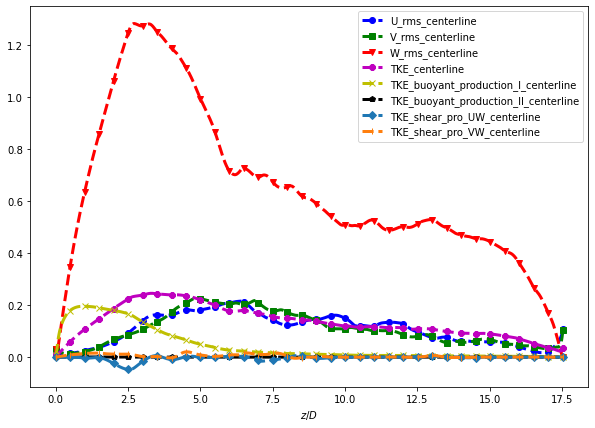

In [8]:
# Tesiting out Centerline plot
U_rms_centerline = hf_profile1.U_rms_centerline
V_rms_centerline = hf_profile1.V_rms_centerline
W_rms_centerline = hf_profile1.W_rms_centerline
TKE_centerline = hf_profile1.TKE_centerline
TKE_buoyant_production_I_centerline = hf_profile1.TKE_buoyant_production_I_centerline
TKE_buoyant_production_II_centerline = hf_profile1.TKE_buoyant_production_II_centerline
TKE_shear_pro_UW_centerline = hf_profile1.TKE_shear_pro_UW_centerline
TKE_shear_pro_VW_centerline = hf_profile1.TKE_shear_pro_VW_centerline

mark = 20
plt.figure(figsize=(10, 7))
zi = np.linspace(0, nz*dz/D, nz)
plotdata = U_rms_centerline/wcm
plt.plot(zi,plotdata,'bo--', label='U_rms_centerline', markevery = mark, linewidth=3)
plotdata = V_rms_centerline/wcm
plt.plot(zi,plotdata,'gs--', label='V_rms_centerline',markevery = mark, linewidth=3)
plotdata = W_rms_centerline/wcm
plt.plot(zi,plotdata,'rv--', label='W_rms_centerline',markevery = mark, linewidth=3)
plotdata = TKE_centerline/(wcm**2)
plt.plot(zi,plotdata,'m8--', label='TKE_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_I_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'yx--', label='TKE_buoyant_production_I_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_II_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'kp--', label='TKE_buoyant_production_II_centerline', markevery = mark,linewidth=3)
plotdata = TKE_shear_pro_UW_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'D--', label='TKE_shear_pro_UW_centerline', markevery = mark,linewidth=3)
plotdata = TKE_shear_pro_VW_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'|--', label='TKE_shear_pro_VW_centerline', markevery = mark,linewidth=3)
plt.legend()
plt.xlabel("$z/D$")
plt.savefig(dataname+"_HF_Centerline_Profile.png")

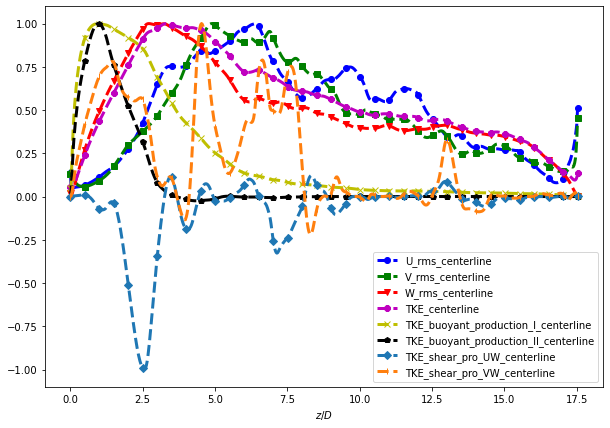

In [18]:
mark = 20
plt.figure(figsize=(10, 7))
zi = np.linspace(0, nz*dz/D, nz)
plotdata = U_rms_centerline/U_rms_centerline.max()
plt.plot(zi,plotdata,'bo--', label='U_rms_centerline', markevery = mark, linewidth=3)
plotdata = V_rms_centerline/ V_rms_centerline.max()
plt.plot(zi,plotdata,'gs--', label='V_rms_centerline',markevery = mark, linewidth=3)
plotdata = W_rms_centerline/W_rms_centerline.max()
plt.plot(zi,plotdata,'rv--', label='W_rms_centerline',markevery = mark, linewidth=3)
plotdata = TKE_centerline/TKE_centerline.max()
plt.plot(zi,plotdata,'m8--', label='TKE_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_I_centerline/TKE_buoyant_production_I_centerline.max()
plt.plot(zi,plotdata,'yx--', label='TKE_buoyant_production_I_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_II_centerline/TKE_buoyant_production_II_centerline.max()
plt.plot(zi,plotdata,'kp--', label='TKE_buoyant_production_II_centerline', markevery = mark,linewidth=3)
plotdata = TKE_shear_pro_UW_centerline/abs(TKE_shear_pro_UW_centerline).max()
plt.plot(zi,plotdata,'D--', label='TKE_shear_pro_UW_centerline', markevery = mark,linewidth=3)
plotdata = TKE_shear_pro_VW_centerline/TKE_shear_pro_VW_centerline.max()
plt.plot(zi,plotdata,'|--', label='TKE_shear_pro_VW_centerline', markevery = mark,linewidth=3)
plt.legend()
plt.xlabel("$z/D$")
plt.savefig(dataname+"_HF_Centerline_Profile_Normalized.png")

In [10]:
# def hf_contour(data,interface,dx,dz,D,threshold,title):
#     import numpy as np
#     import matplotlib.pyplot as plt
#     data = data.T
#     interface = interface.T
#     nz,nx = np.shape(data)
#     plt.style.use('seaborn-white')
#     xi = np.linspace(-nx*.5*dx/D, nx*.5*dx/D, nx)
#     zi = np.linspace(0, nz*dz/D, nz)
#     plt.figure(figsize=(10, 10))
#     contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
#     plt.ylabel("$z/D$",fontsize=14)
#     plt.xlabel("$x/D$", rotation=0, fontsize=14, labelpad=10)
#     plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], origin='lower',cmap='jet',alpha=1,aspect='auto')
#     plt.colorbar()
#     #Creating a folder for the plots
#     current_directory = os.getcwd()
#     final_directory = os.path.join(current_directory, r'Plots')
#     if not os.path.exists(final_directory):
#        os.makedirs(final_directory) 
#     plt.savefig(final_directory+"\\"+title+".png")

In [ ]:
# Contour Plot 
# hf_contour(hf_profile1.Re_stress_UW,hf_profile1.interface,dx,dz,D,threshold,"Reynolds Stress UW")
# hf_contour(hf_profile1.Re_stress_VW,hf_profile1.interface,dx,dz,D,threshold,"Reynolds Stress VW")
# hf_contour(hf_profile1.TKE_buoyant_production_I,hf_profile1.interface,dx,dz,D,threshold,"TKE Buoyant Production I")
# hf_contour(hf_profile1.TKE_shear_pro_UW,hf_profile1.interface,dx,dz,D,threshold,"TKE Shear Production UW")
# hf_contour(hf_profile1.TKE_shear_pro_VW,hf_profile1.interface,dx,dz,D,threshold,"TKE Shear Production VW")
# hf_contour(hf_profile1.TKE_buoyant_production_II,hf_profile1.interface,dx,dz,D,threshold, "TKE Buoyant Production II")
# hf_contour(hf_profile1.TKE, hf_profile1.interface,dx,dz,D,threshold,"TKE")